In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('/content/1. Weather Data.csv')

In [3]:
# Display the shape of the dataset
print(f"The dataset contains {df.shape[0]} records and {df.shape[1]} features.")


The dataset contains 8784 records and 8 features.


In [4]:
# Display data types and the first few rows
print(df.dtypes)
df.head()

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

In [6]:
print(missing_values)

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()


In [8]:
print(duplicates)

0


In [9]:
# Summary statistics
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [11]:
# Convert relevant columns to numeric type
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object type (likely string)
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertible with NaN
        except:
            pass  # If conversion fails, skip the column

# Detect outliers using IQR (after conversion)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].dropna()

# Display outliers
outliers

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather


# Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

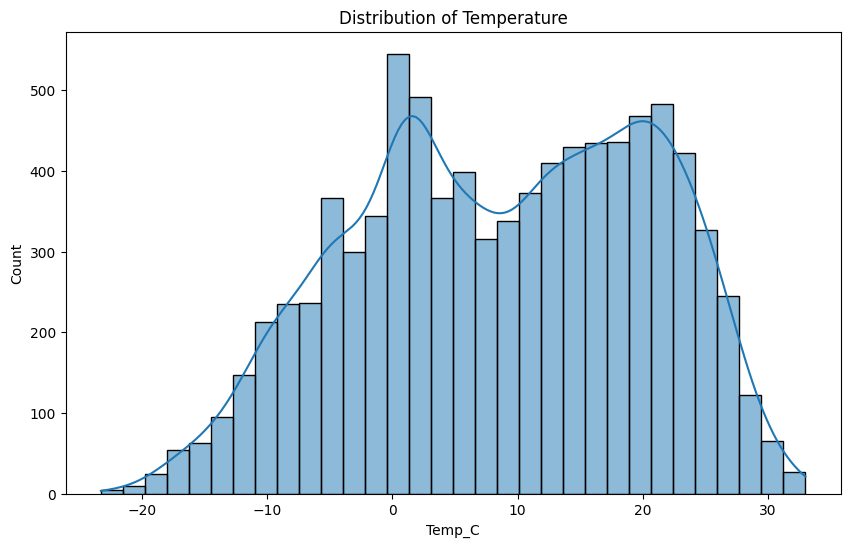

In [14]:
# Histogram for temperature
plt.figure(figsize=(10,6))
sns.histplot(df['Temp_C'], kde=True)
plt.title('Distribution of Temperature')
plt.show()


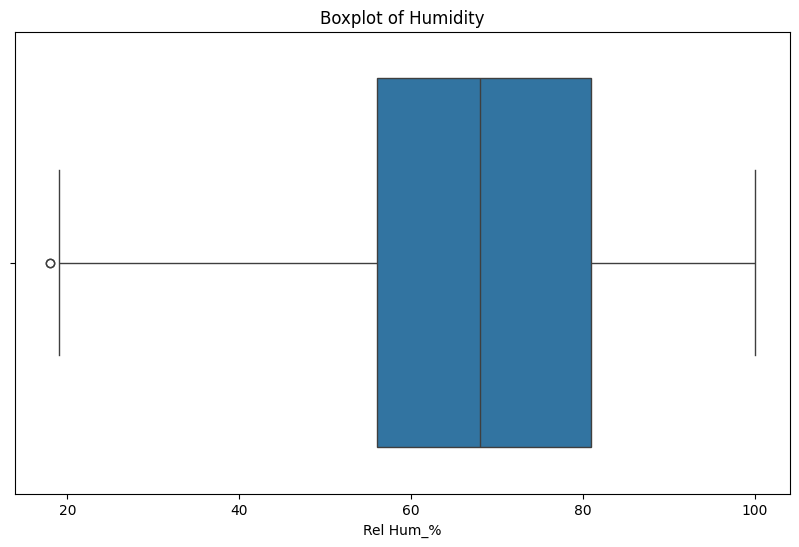

In [15]:
# Boxplot for humidity
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Rel Hum_%'])
plt.title('Boxplot of Humidity')
plt.show()

In [17]:
# Convert date column to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])


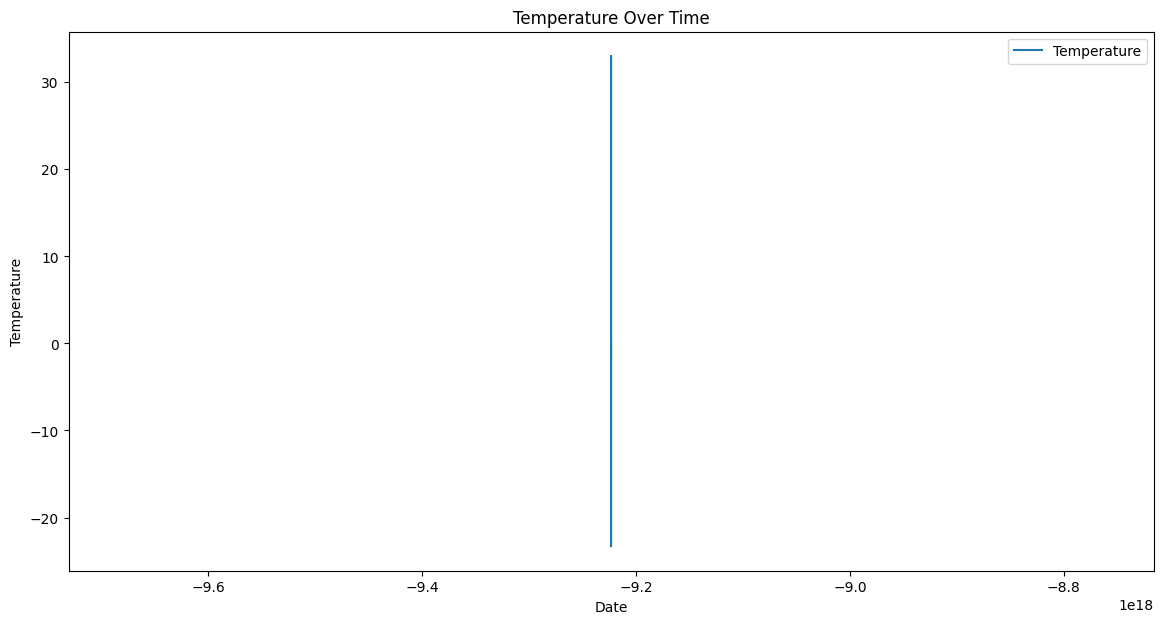

In [18]:
# Plot time series for temperature
plt.figure(figsize=(14,7))
plt.plot(df['Date/Time'], df['Temp_C'], label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [19]:
# Correlation matrix
corr_matrix = df.corr()

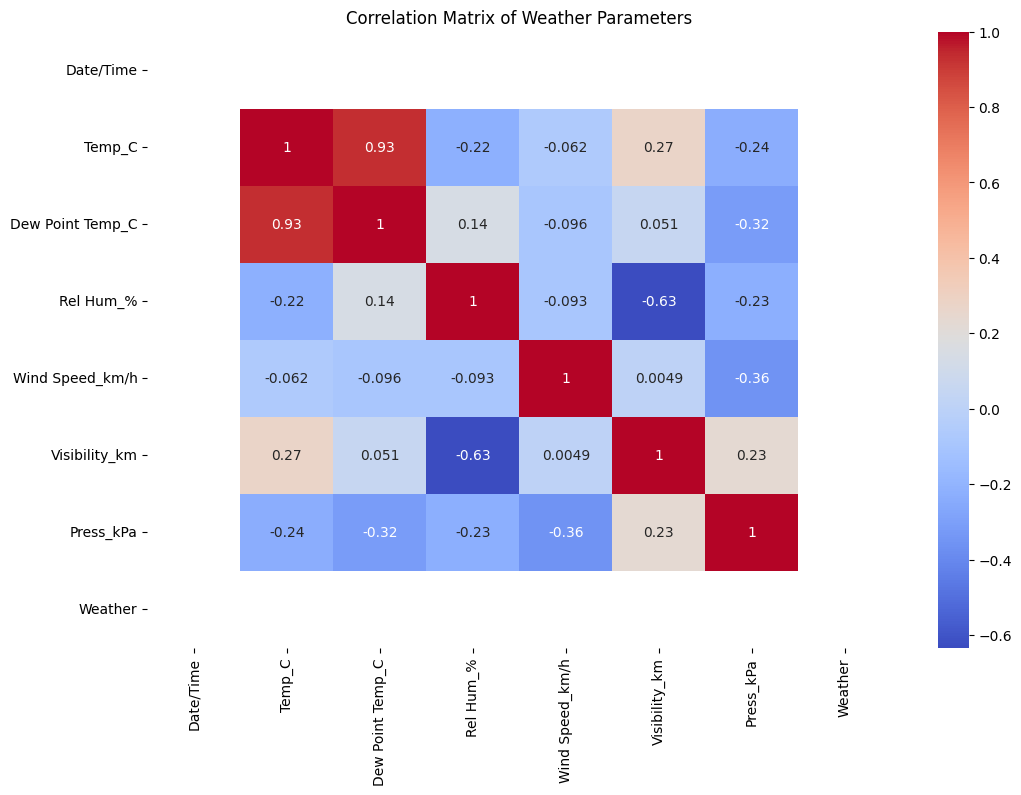

In [20]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

In [22]:
# Temperature by season
df['month'] = df['Date/Time'].dt.month

monthly_avg_temp = df.groupby('month')['Temp_C'].mean()

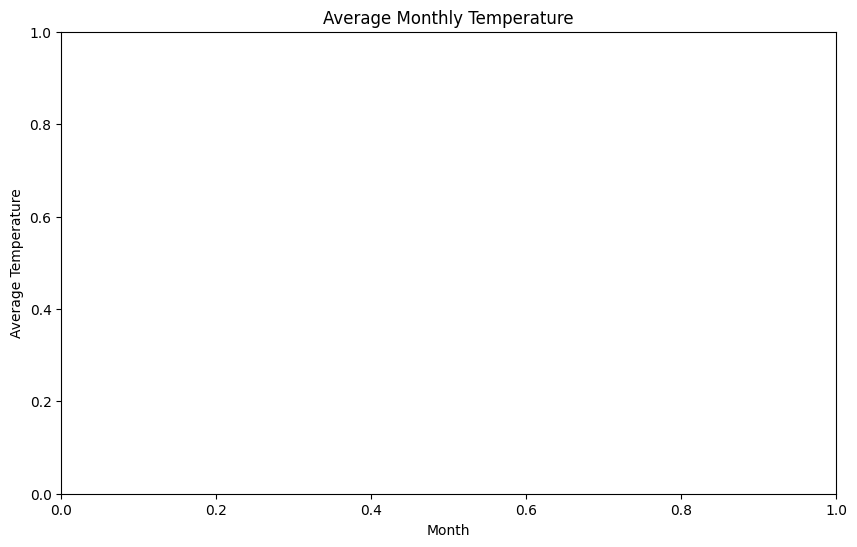

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values)
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()